In [ ]:
#adding libraries
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import csv
import requests
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt66
import seaborn as sns
import scipy.stats as stats
from sklearn import metrics

In [ ]:
import pandas as pd
df = pd.read_csv("Student_performance_data.csv")

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
print(df["Gender"].value_counts())
print(df["Volunteering"].value_counts())
print(df["GradeClass"].value_counts())
print(df["Age"].value_counts())


In [ ]:

# Eğer gender ve voluntary_work metinse önce sayıya çevir
df["Gender"] = df["Gender"].astype("category").cat.codes
df["Volunteering"] = df["Volunteering"].astype("category").cat.codes

reduced_df = df[["GPA", "Age", "Volunteering", "Gender", "GradeClass","Age", "StudyTimeWeekly", "Absences"]]

# #Dataset data are displayed
print(reduced_df.describe())
print(reduced_df.info())

DATA NORMALIZATION


In [ ]:
df["GPA"] = (df["GPA"] - df["GPA"].min()) / (df["GPA"].max() - df["GPA"].min())
df["StudyTimeWeekly"] = (df["StudyTimeWeekly"] - df["StudyTimeWeekly"].min()) / (df["StudyTimeWeekly"].max() - df["StudyTimeWeekly"].min())
df["Absences"] = (df["Absences"] - df["Absences"].min()) / (df["Absences"].max() - df["Absences"].min())
df["Age"] = (df["Age"] - df["Age"].min()) / (df["Age"].max() - df["Age"].min())

print(df.head(10))
print(df.describe())


# DATA VISUALISATION

In [ ]:
import matplotlib.pyplot as plt

# Select numeric features
data_for_visualisation = df[["GPA", "Volunteering", "Gender", "StudyTimeWeekly", "Absences", "Age"]]

# Limit data to first 300 rows for clarity (optional)
data_for_visualisation = data_for_visualisation.head(250)

# Line plot
data_for_visualisation.plot(figsize=(12, 6))
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Subset of selected features
pairplot_df = df[["GPA", "Volunteering", "Gender", "StudyTimeWeekly", "Absences", "GradeClass"]].dropna()

# Limit to first 500 samples for clearer visualization
pairplot_df = pairplot_df.head(500)

# Create pairplot with scatter plots and class coloring
plot = sns.pairplot(
    pairplot_df,
    hue="GradeClass",
    palette="muted",
    height=2.5,
    kind="scatter"
)

# Set plot title
#
plt.subplots_adjust(top=0.9)
plot.fig.suptitle("Feature Pairplot by GradeClass", fontsize=16, color='b')


In [ ]:
import matplotlib.pyplot as plt

# Select relevant numeric or categorical-as-numeric columns
columns_to_plot = ["GPA", "Volunteering", "Gender", "StudyTimeWeekly", "Absences", "Age", "GradeClass"]

# Plot histograms
df[columns_to_plot].hist(figsize=(14, 8))
plt.tight_layout()
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
numeric_features = df[["GPA", "Volunteering", "Gender", "StudyTimeWeekly", "Absences"]]

# Compute correlation matrix
correlation_matrix = numeric_features.corr(method='pearson')

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("pearson")
plt.show()


# TASK 2

In [18]:
from sklearn.cluster import AgglomerativeClustering

clustering_dataset = df[["GPA", "StudyTimeWeekly", "Absences"]].dropna()

clustering = AgglomerativeClustering().fit(clustering_dataset)



In [19]:
from sklearn.cluster import AgglomerativeClustering

clustering_dataset = df[["GPA", "StudyTimeWeekly", "Absences"]].dropna()

model_2_clusters = AgglomerativeClustering(n_clusters=2, linkage='ward')
labels_2 = model_2_clusters.fit_predict(clustering_dataset)



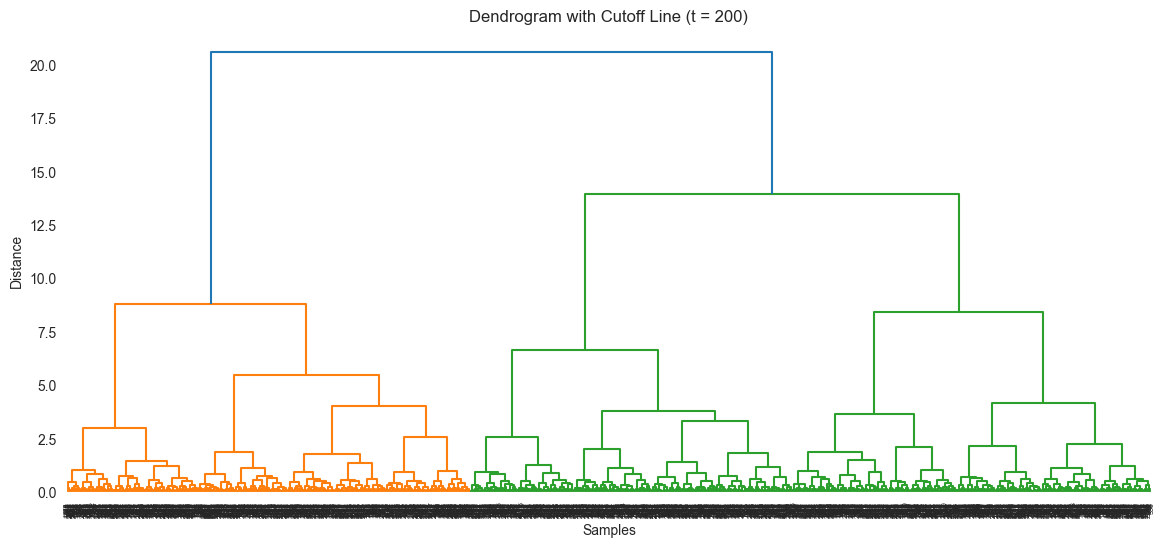

Cutoff t = 200 --> Number of clusters: 1


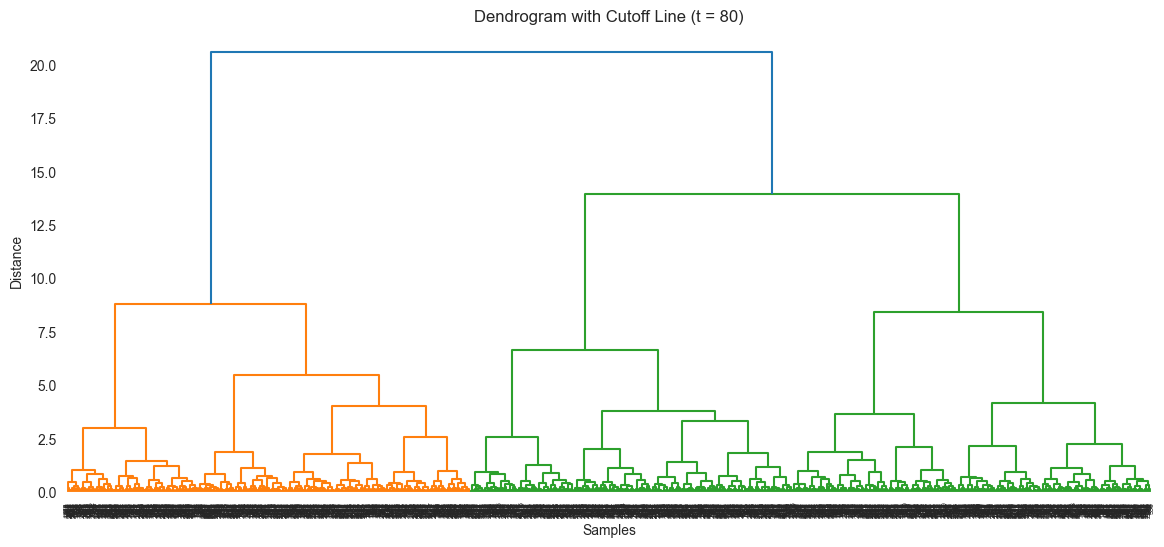

Cutoff t = 80 --> Number of clusters: 1


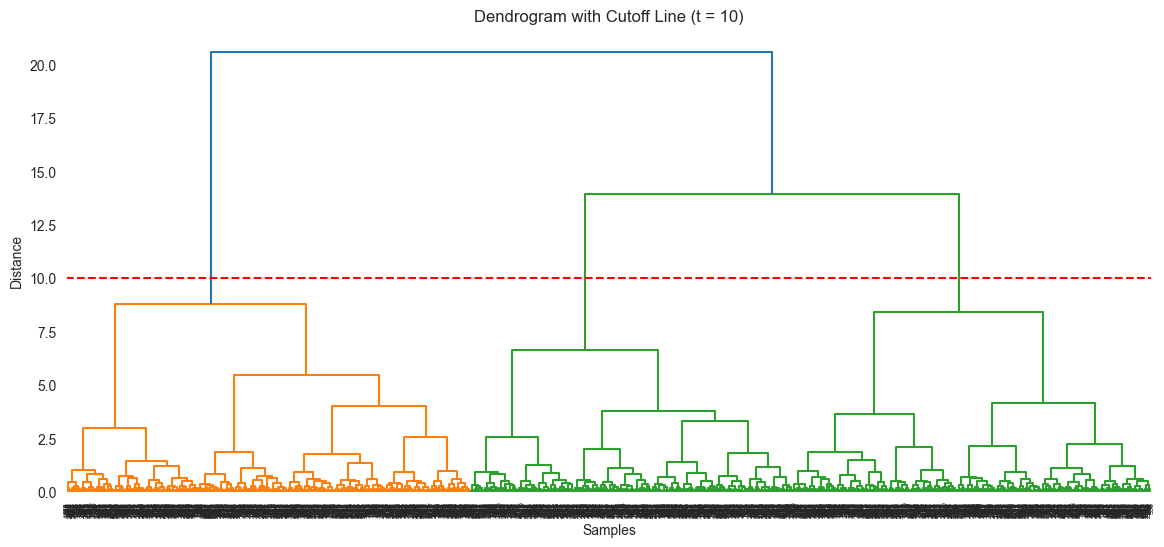

Cutoff t = 10 --> Number of clusters: 3


In [20]:
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import fcluster
import matplotlib.pyplot as plt

# data selecting
clustering_dataset = df[["GPA", "StudyTimeWeekly", "Absences"]].dropna()

#
linkage_matrix = shc.linkage(clustering_dataset, method='ward')

# Cutoff levels
cutoffs = [200, 80, 10]

#
for t in cutoffs:
    plt.figure(figsize=(14, 6))
    shc.dendrogram(linkage_matrix)
    plt.axhline(y=t, color='r', linestyle='--')
    plt.title(f"Dendrogram with Cutoff Line (t = {t})")
    plt.xlabel("Samples")
    plt.ylabel("Distance")
    plt.show()

    #
    labels = fcluster(linkage_matrix, t=t, criterion='distance')
    print(f"Cutoff t = {t} --> Number of clusters: {len(set(labels))}")


# K-MEANS ALGORITHM

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt

# Feature selection for clustering
clustering_dataset = df[["GPA", "StudyTimeWeekly", "Absences"]].dropna()

# List to store silhouette scores
silhouette_scores = []

# Loop through k values from 2 to 6
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(clustering_dataset)
    score = metrics.silhouette_score(clustering_dataset, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"k = {k} --> Silhouette Score = {score:.4f}")

# Plotting silhouette scores
plt.figure(figsize=(6, 4))
plt.plot(range(2, 7), silhouette_scores, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette score")
plt.title("Silhouette scores for K-means clustering")
plt.grid(True)
plt.show()


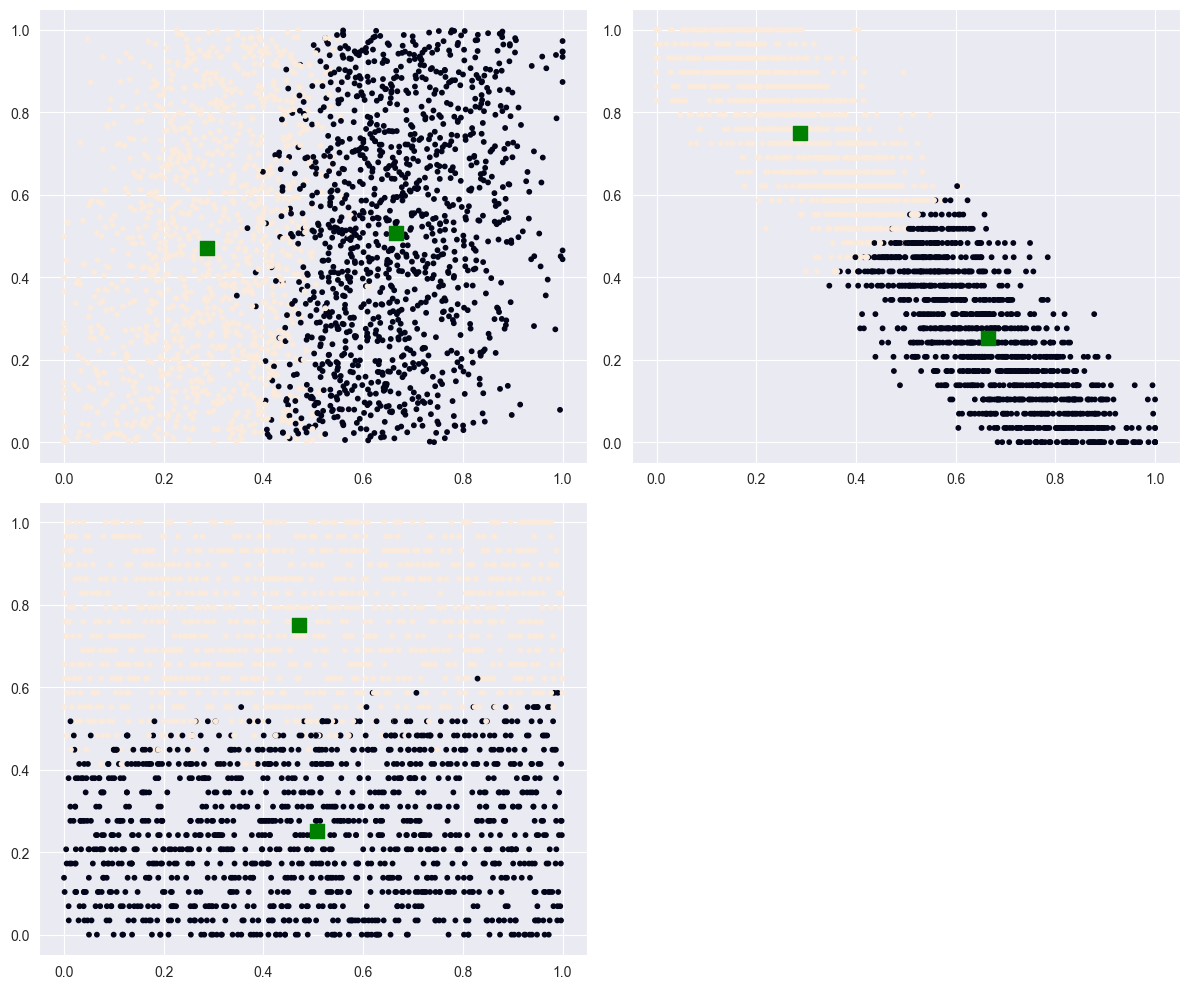

In [17]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Use selected numeric features
clustering_dataset = df[["GPA", "StudyTimeWeekly", "Absences"]].dropna()

# Fit KMeans model
kmeans_model = KMeans(n_clusters=2, init="k-means++", random_state=42).fit(clustering_dataset)

# Cluster centers
centroids = kmeans_model.cluster_centers_

# Predicted labels
y_pred = kmeans_model.predict(clustering_dataset)

# Plotting in 2x2 layout
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.scatter(clustering_dataset["GPA"], clustering_dataset["StudyTimeWeekly"], s=10, c=y_pred)
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='g', marker='s')

plt.subplot(2, 2, 2)
plt.scatter(clustering_dataset["GPA"], clustering_dataset["Absences"], s=10, c=y_pred)
plt.scatter(centroids[:, 0], centroids[:, 2], s=100, c='g', marker='s')

plt.subplot(2, 2, 3)
plt.scatter(clustering_dataset["StudyTimeWeekly"], clustering_dataset["Absences"], s=10, c=y_pred)
plt.scatter(centroids[:, 1], centroids[:, 2], s=100, c='g', marker='s')

plt.tight_layout()
plt.show()


# TASK 3

# KNN

In [22]:
#importing a library for splitting the dataset into test and training dataset
from sklearn.model_selection import train_test_split
#saving the target values of the data objects, i.e. "grade classes", in a separate variable
targets = df['GradeClass']
#specifying the proportion of data objects that will form the training dataset (70%)
training_proportion = 0.7
#splitting the dataset into test and training sets using a random 70:30 split
X_train, X_test, y_train, y_test = train_test_split(clustering_dataset, targets, test_size=1.0 - training_proportion, random_state=42)

In [23]:
#importing a library to use the algorithm
from sklearn.neighbors import KNeighborsClassifier
#a model with 5 neighbours is created
KNN_MODEL = KNeighborsClassifier(n_neighbors=5)
#Feed the training dataset to the model
KNN_MODEL.fit(X_train, y_train)
#we use the trained model with a test set to obtain predictions
y_predictions_knn = KNN_MODEL.predict(X_test)

              precision    recall  f1-score   support

           0       0.82      0.42      0.56        33
           1       0.75      0.76      0.76        80
           2       0.78      0.78      0.78       121
           3       0.80      0.77      0.78       127
           4       0.92      0.97      0.94       357

    accuracy                           0.85       718
   macro avg       0.81      0.74      0.76       718
weighted avg       0.85      0.85      0.85       718



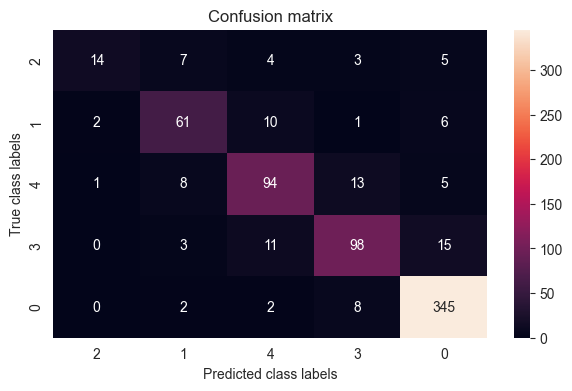

In [26]:
#importing libraries for acquiring and representing performance metrics
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import pylab as pltb
#displaying metrics
print(classification_report(y_test,y_predictions_knn, zero_division=0))
#creating a confusion matrix
my_confusion_matrix = confusion_matrix(y_test, y_predictions_knn)
#displaying the confusion matrix
fig, ax = pltb.subplots(figsize=(7,4))
sns.heatmap(my_confusion_matrix, annot = True, fmt = 'g', ax = ax);
ax.set_xlabel('Predicted class labels');
ax.set_ylabel('True class labels');
ax.set_title('Confusion matrix');
ax.xaxis.set_ticklabels(df['GradeClass'].unique());
ax.yaxis.set_ticklabels(df['GradeClass'].unique());

In [27]:
#importing a library to work with artificial neural networks
from sklearn.neural_network import MLPClassifier
#building an artificial neural network model with 2 layers, each containing 100 neurons
#The following parameters are set: the maximum number of training iterations is 1000, the activation function is logistic,
#the weight matching method is stochastic gradient descent, the output of training iterations
my_ann_model = MLPClassifier(hidden_layer_sizes=(100,100), max_iter=1000, activation = 'logistic', solver='sgd', learning_rate_init = 0.1, verbose = 1)
my_ann_model.fit(X_train, y_train)

Iteration 1, loss = 1.40803204
Iteration 2, loss = 1.34134976
Iteration 3, loss = 1.33398584
Iteration 4, loss = 1.32969782
Iteration 5, loss = 1.33300488
Iteration 6, loss = 1.32861679
Iteration 7, loss = 1.33982702
Iteration 8, loss = 1.32674582
Iteration 9, loss = 1.32716861
Iteration 10, loss = 1.32508142
Iteration 11, loss = 1.31475294
Iteration 12, loss = 1.31528518
Iteration 13, loss = 1.30670960
Iteration 14, loss = 1.29354631
Iteration 15, loss = 1.29782550
Iteration 16, loss = 1.26731128
Iteration 17, loss = 1.23622731
Iteration 18, loss = 1.19499776
Iteration 19, loss = 1.13990792
Iteration 20, loss = 1.08541831
Iteration 21, loss = 1.01076232
Iteration 22, loss = 0.96005575
Iteration 23, loss = 0.92890441
Iteration 24, loss = 0.91576327
Iteration 25, loss = 0.90151971
Iteration 26, loss = 0.88765381
Iteration 27, loss = 0.88202835
Iteration 28, loss = 0.87263531
Iteration 29, loss = 0.86828060
Iteration 30, loss = 0.86986311
Iteration 31, loss = 0.86775210
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 100),
              learning_rate_init=0.1, max_iter=1000, solver='sgd', verbose=1)

              precision    recall  f1-score   support

           0       0.86      0.58      0.69        33
           1       0.75      0.88      0.81        80
           2       0.93      0.79      0.85       121
           3       0.84      0.89      0.86       127
           4       0.94      0.96      0.95       357

    accuracy                           0.89       718
   macro avg       0.86      0.82      0.83       718
weighted avg       0.90      0.89      0.89       718



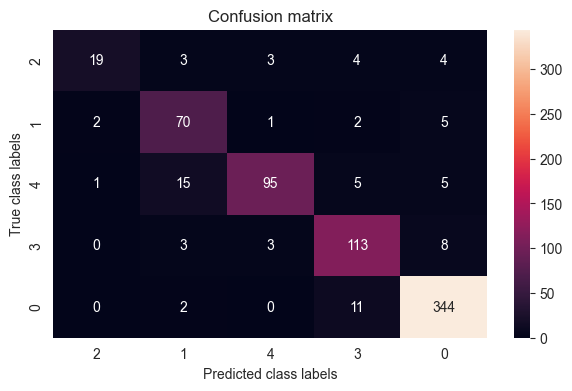

In [30]:
#importing libraries for acquiring and representing performance metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import pylab as pltb
#we use the trained model with a test set to obtain predictions
y_predictions = my_ann_model.predict(X_test)
#displaying metrics
print(classification_report(y_test,y_predictions, zero_division=0))
#creating a confusion matrix
my_confusion_matrix = confusion_matrix(y_test, y_predictions)
#displaying the confusion matrix
fig, ax = pltb.subplots(figsize=(7,4))
sns.heatmap(my_confusion_matrix, annot = True, fmt = 'g', ax = ax);
ax.set_xlabel('Predicted class labels');
ax.set_ylabel('True class labels');
ax.set_title('Confusion matrix');
ax.xaxis.set_ticklabels(df['GradeClass'].unique());
ax.yaxis.set_ticklabels(df['GradeClass'].unique());

In [31]:
#building an artificial neural network model with 1 layer and 5 neurons in it
#The following parameters are set: the maximum number of training iterations is 50, the activation function is logistic,
#the weight matching method is stochastic gradient descent, the output of training iterations
my_ann_model_2 = MLPClassifier(hidden_layer_sizes=(5), max_iter=50, activation = 'logistic', solver='sgd', learning_rate_init = 0.2, verbose = 0)
my_ann_model_2.fit(X_train, y_train)

C:\Users\Hp\PycharmProjects\machine-learning-assignment-python\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=5,
              learning_rate_init=0.2, max_iter=50, solver='sgd', verbose=0)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.62      0.56      0.59        80
           2       0.65      0.75      0.70       121
           3       0.71      0.51      0.59       127
           4       0.85      0.98      0.91       357

    accuracy                           0.77       718
   macro avg       0.56      0.56      0.56       718
weighted avg       0.72      0.77      0.74       718



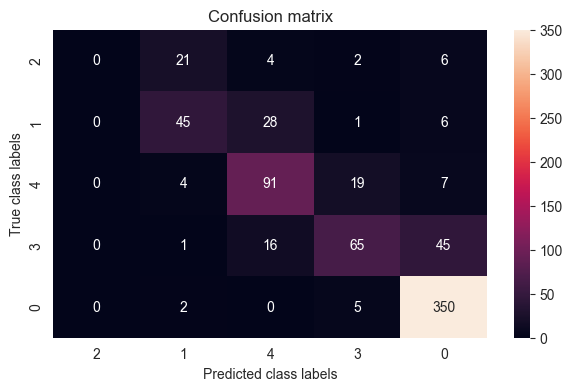

In [33]:
#we use the trained model with a test set to obtain predictions
y_predictions_2 = my_ann_model_2.predict(X_test)
#displaying metrics
print(classification_report(y_test,y_predictions_2, zero_division=0))
#creating a confusion matrix
my_confusion_matrix = confusion_matrix(y_test, y_predictions_2)
#displaying the confusion matrix
fig, ax = pltb.subplots(figsize=(7,4))
sns.heatmap(my_confusion_matrix, annot = True, fmt = 'g', ax = ax);
ax.set_xlabel('Predicted class labels');
ax.set_ylabel('True class labels');
ax.set_title('Confusion matrix');
ax.xaxis.set_ticklabels(df['GradeClass'].unique());
ax.yaxis.set_ticklabels(df['GradeClass'].unique());